In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set(rc={'figure.figsize':(12,6)})
pd.set_option('display.max_columns', 50)
%matplotlib inline

import warnings
warnings.filterwarnings("ignore") 

In [2]:
malaria = pd.read_csv("malaria_climate_data.csv")

In [3]:
# Checking the size of the data
print(f"This dataset contains {malaria.shape[0]} rows and {malaria.shape[1]} columns")

This dataset contains 782 rows and 30 columns


In [4]:
# Checking the feature types
print(f"This dataset contains {malaria.select_dtypes(include=['object']).shape[1]} categorical features and {malaria.select_dtypes(include=['int', 'float']).shape[1]} numerical features")

This dataset contains 4 categorical features and 26 numerical features


In [5]:
malaria.head()

Country Code  Country         Income Group  Year  \
0          DZA  Algeria  Lower middle income  2005   
1          DZA  Algeria  Lower middle income  2006   
2          DZA  Algeria  Lower middle income  2007   
3          DZA  Algeria  Lower middle income  2008   
4          DZA  Algeria  Lower middle income  2009   

   incidence_rate (per 1000 pop at risk)  % basic_DW_all  % basic_DW_rural  \
0                                    0.0            91.1              85.0   
1                                    0.0            91.4              85.4   
2                                    0.0            91.6              85.7   
3                                    0.0            91.8              86.0   
4                                    0.0            92.1              86.4   

   % basic_DW_urban  % basic_sanitation_all  % basic_sanitation_rural  \
0              94.6                    85.8                      75.4   
1              94.7                    86.1                      75.7   
2              94.7                    86.3                      76.1   
3              94.8                    86.5                      76.4   
4              94.9                    86.8                      76.7   

   % basic_sanitation_urban  % death_rate  \
0                      91.7           0.0   
1                      91.7           0.0   
2                      91.7           0.0   
3                      91.7           0.0   
4                      91.7           0.0   

   % children_with_fever_receiving_treatment  % literacy_rate  % rural_pop  \
0                                        4.9              0.0         36.2   
1                                        4.9             72.6         35.4   
2                                        4.9              0.0         34.7   
3                                        4.9             75.1         33.9   
4                                        4.7              0.0         33.2   

   % safe_DW_all  % safe_DW_rural  % safe_DW_urban  % safe_sanitation_all  \
0           72.8             56.5             82.0                   60.5   
1           73.2             57.4             81.9                   60.8   
2           73.7             58.3             81.9                   61.1   
3           74.2             59.3             81.8                   61.4   
4           74.6             60.2             81.8                   61.7   

   % safe_sanitation_rural  % safe_sanitation_urban  % urban_pop  \
0                     50.4                     66.2         63.8   
1                     50.8                     66.3         64.6   
2                     51.2                     66.4         65.3   
3                     51.6                     66.4         66.1   
4                     52.0                     66.5         66.8   

   % insecticide_treated_bed_net   Latitude  Longitude   \
0                            0.0  28.033886    1.659626   
1                            0.0  28.033886    1.659626   
2                            0.0  28.033886    1.659626   
3                            0.0  28.033886    1.659626   
4                            0.0  28.033886    1.659626   

                     Geometry   Humidity  Precipitation  Temperature  \
0  POINT (28.033886 1.659626)  31.734205      10.968121    13.504072   
1  POINT (28.033886 1.659626)   0.000000       0.000000     0.000000   
2  POINT (28.033886 1.659626)  69.520863      74.638687     5.783653   
3  POINT (28.033886 1.659626)  52.958708      86.310334     7.554852   
4  POINT (28.033886 1.659626)  88.990603      44.402714    17.102406   

   Wind Speed  
0    8.769347  
1    0.000000  
2   25.478604  
3    8.661352  
4   26.639289

In [6]:
malaria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country Code                               782 non-null    object 
 1   Country                                    782 non-null    object 
 2   Income Group                               782 non-null    object 
 3   Year                                       782 non-null    int64  
 4   incidence_rate (per 1000 pop at risk)      782 non-null    float64
 5   % basic_DW_all                             782 non-null    float64
 6   % basic_DW_rural                           782 non-null    float64
 7   % basic_DW_urban                           782 non-null    float64
 8   % basic_sanitation_all                     782 non-null    float64
 9   % basic_sanitation_rural                   782 non-null    float64
 10  % basic_sanitation_urban  

In [7]:
malaria.describe()

Year  incidence_rate (per 1000 pop at risk)  % basic_DW_all  \
count   782.000000                             782.000000      782.000000   
mean   2013.000000                             179.975703       64.493223   
std       4.902115                             158.571867       18.042060   
min    2005.000000                               0.000000        0.000000   
25%    2009.000000                              26.350000       52.325000   
50%    2013.000000                             154.100000       63.700000   
75%    2017.000000                             326.400000       76.000000   
max    2021.000000                             709.800000      100.000000   

       % basic_DW_rural  % basic_DW_urban  % basic_sanitation_all  \
count        782.000000        782.000000              782.000000   
mean          49.765985         81.009079               37.160358   
std           19.834785         18.090561               24.691060   
min            0.000000          0.000000                0.000000   
25%           36.925000         76.500000               17.800000   
50%           49.450000         84.050000               32.550000   
75%           61.175000         90.000000               47.500000   
max          100.000000        100.000000              100.000000   

       % basic_sanitation_rural  % basic_sanitation_urban  % death_rate  \
count                782.000000                782.000000    782.000000   
mean                  25.876726                 46.441944      6.336573   
std                   22.423964                 22.595821     15.252554   
min                    0.000000                  0.000000      0.000000   
25%                    8.400000                 30.000000      0.000000   
50%                   18.800000                 43.950000      0.000000   
75%                   34.600000                 57.475000      0.000000   
max                   97.100000                 97.600000     76.900000   

       % children_with_fever_receiving_treatment  % literacy_rate  \
count                                 782.000000       782.000000   
mean                                    9.483887        11.261381   
std                                     2.800831        25.923736   
min                                     4.400000         0.000000   
25%                                     7.425000         0.000000   
50%                                     8.900000         0.000000   
75%                                    11.100000         0.000000   
max                                    20.900000        96.200000   

       % rural_pop  % safe_DW_all  % safe_DW_rural  % safe_DW_urban  \
count   782.000000     782.000000       782.000000       782.000000   
mean     57.343990      11.166240         6.527749        23.814322   
std      17.682392      18.822204        13.732777        27.967732   
min       9.600000       0.000000         0.000000         0.000000   
25%      45.900000       0.000000         0.000000         0.000000   
50%      59.000000       0.000000         0.000000        12.000000   
75%      70.000000      17.075000         7.075000        40.300000   
max      90.600000      77.000000        68.900000        90.300000   

       % safe_sanitation_all  % safe_sanitation_rural  \
count             782.000000               782.000000   
mean               14.228261                11.179412   
std                18.868126                14.548919   
min                 0.000000                 0.000000   
25%                 0.000000                 0.000000   
50%                 7.000000                 5.000000   
75%                20.850000                17.175000   
max                81.000000                62.900000   

       % safe_sanitation_urban  % urban_pop  % insecticide_treated_bed_net  \
count               782.000000   782.000000                     782.000000   
mean                 16.445652    42.656394                       9.357928   
std         

In [8]:
malaria.describe(include="object")

Country Code  Country         Income Group                    Geometry
count           782      782                  782                         782
unique           46       46                    4                          46
top             DZA  Algeria  Lower middle income  POINT (28.033886 1.659626)
freq             17       17                  340                          17

### Univariate Analysis

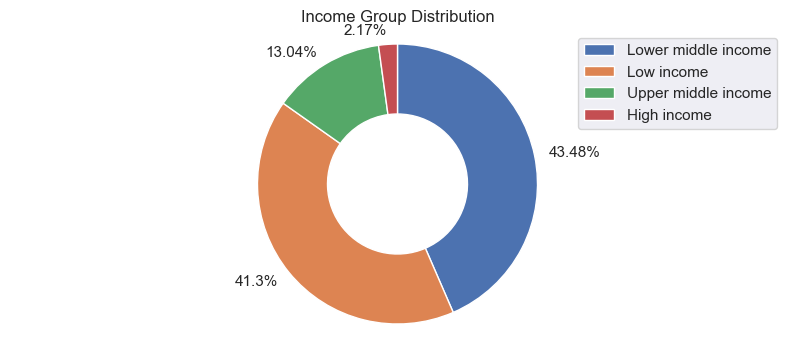

In [9]:
# Plot of Income Group distribution
incomegroup = round(malaria['Income Group'].value_counts(normalize=True)*100,2)
plt.figure(figsize=(10, 4))
plt.pie(incomegroup, labels=[f"{str(x)}%" for x in incomegroup.values], startangle=90, counterclock = False, wedgeprops = {'width': 0.5});

plt.title('Income Group Distribution', fontsize=12)
plt.legend(incomegroup.index, loc='upper right')
plt.axis('equal');

The donut chart simply shows a large share in the lower middle income and low income countries accounting for about `85%` of all Africa countries while just `2.17%` account for high income countries

In [10]:
grouped_df = malaria.groupby('Country')['incidence_rate (per 1000 pop at risk)'].sum().reset_index()

In [11]:
# Create the grouped DataFrame
grouped_df = malaria.groupby('Country')['incidence_rate (per 1000 pop at risk)'].sum().reset_index()

# Calculate the total value
total_value = grouped_df['incidence_rate (per 1000 pop at risk)'].sum()

# Calculate the percentage distribution
malaria_country_pct = round((grouped_df['incidence_rate (per 1000 pop at risk)'] / total_value) * 100, 2)

# Concatenate DataFrames and rename
malaria_country_distribution = pd.concat([grouped_df, malaria_country_pct], axis=1)
malaria_country_distribution.columns = ['Country', 'incidence_rate_(sum)', 'Percentage']

# Sort values by 'Sum' in descending order
malaria_country_distribution = malaria_country_distribution.sort_values(by='Percentage', ascending=False)

malaria_country_distribution

Country  incidence_rate_(sum)  Percentage
4               Burkina Faso                7905.8        5.62
2                      Benin                7072.7        5.03
36              Sierra Leone                6818.5        4.84
24                      Mali                6691.6        4.75
7   Central African Republic                6370.1        4.53
17                    Guinea                6357.4        4.52
30                     Niger                6190.2        4.40
21                   Liberia                6127.6        4.35
28                Mozambique                6105.1        4.34
10             Cote d'Ivoire                5935.1        4.22
43                    Uganda                5843.4        4.15
31                   Nigeria                5826.0        4.14
41                      Togo                5639.8        4.01
23                    Malawi                4996.1        3.55
6                   Cameroon                4961.3        3.53
16                     Ghana                4823.4        3.43
12         Equatorial Guinea                4770.8        3.39
5                    Burundi                3935.9        2.80
32                    Rwanda                3814.8        2.71
1                     Angola                3656.7        2.60
15                     Gabon                3604.5        2.56
8                       Chad                3607.1        2.56
44                    Zambia                3359.6        2.39
40                  Tanzania                2553.5        1.81
14                  Ethiopia                2271.9        1.61
18             Guinea-Bissau                1638.8        1.16
45                  Zimbabwe                1463.8        1.04
19                     Kenya                1255.3        0.89
22                Madagascar                1094.2        0.78
34                   Senegal                1081.4        0.77
37                   Somalia                1071.3        0.76
25                Mauritania                 946.4        0.67
39                     Sudan                 819.3        0.58
9                    Comoros                 600.9        0.43
33     Sao Tome and Principe                 493.2        0.35
13                   Eritrea                 394.2        0.28
11                  Djibouti                 340.1        0.24
29                   Namibia                 258.1        0.18
38              South Africa                  26.0        0.02
3                   Botswana                  19.1        0.01
42                   Tunisia                   0.0        0.00
27                   Morocco                   0.0        0.00
26                 Mauritius                   0.0        0.00
35                Seychelles                   0.0        0.00
20                   Lesotho                   0.0        0.00
0                    Algeria                   0.0        0.00

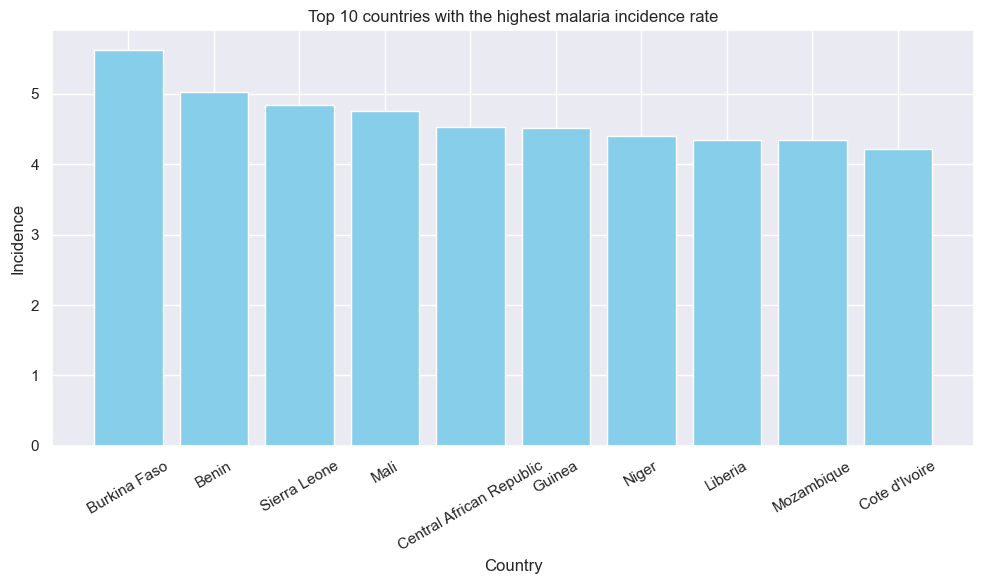

In [12]:
# Plotting top 10 bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(malaria_country_distribution.head(10)['Country'], malaria_country_distribution.head(10)['Percentage'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Incidence')
plt.title('Top 10 countries with the highest malaria incidence rate')
plt.xticks(rotation=30) 
plt.tight_layout();

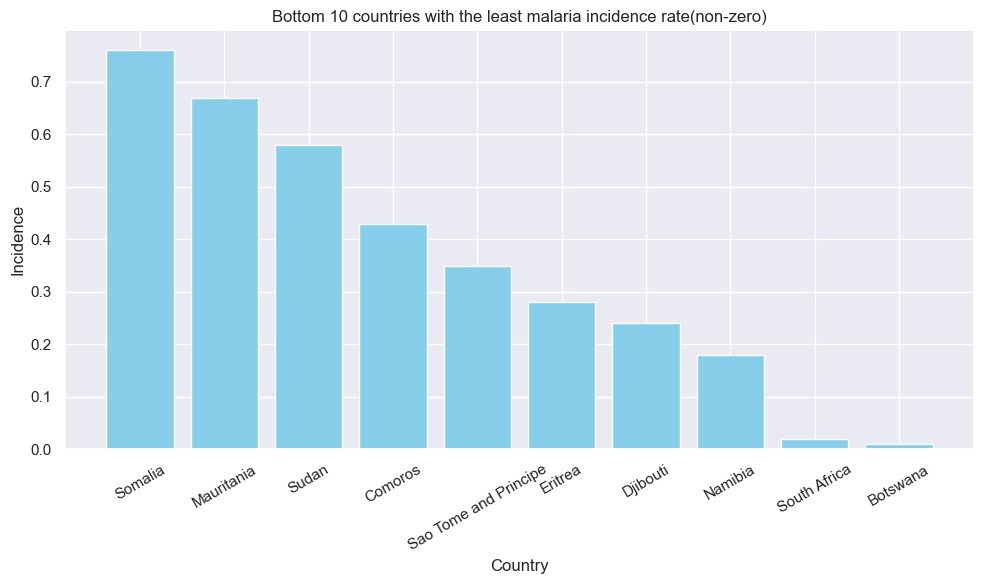

In [13]:
# Plotting Least 10 Countries with non-zero malaria rate 
filtered_df = malaria_country_distribution[malaria_country_distribution['Percentage'] > 0.00]

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(filtered_df.tail(10)['Country'], filtered_df.tail(10)['Percentage'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Incidence')
plt.title('Bottom 10 countries with the least malaria incidence rate(non-zero)')
plt.xticks(rotation=30) 
plt.tight_layout();

In [14]:
top_10 = malaria_country_distribution.head(10)["Country"].unique()
bottom_10_non_zero = filtered_df.tail(10)["Country"].unique()
no_malaria_incidence = malaria_country_distribution.tail(6)["Country"].unique()

print(top_10)
print(bottom_10_non_zero)
print(no_malaria_incidence)

['Burkina Faso' 'Benin' 'Sierra Leone' 'Mali' 'Central African Republic'
 'Guinea' 'Niger' 'Liberia' 'Mozambique' "Cote d'Ivoire"]
['Somalia' 'Mauritania' 'Sudan' 'Comoros' 'Sao Tome and Principe'
 'Eritrea' 'Djibouti' 'Namibia' 'South Africa' 'Botswana']
['Tunisia' 'Morocco' 'Mauritius' 'Seychelles' 'Lesotho' 'Algeria']


In [15]:
#Let's work with the top 5 countries with highest incidence rate
top_10_list = malaria[malaria['Country'].isin(['Burkina Faso', 'Benin', 'Sierra Leone', 'Mali', 'Central African Republic', 
                                               'Guinea', 'Niger', 'Liberia', 'Mozambique', "Cote d'Ivoire"])]

In [16]:
#Let's work with the least 5 countries with least incidence rate (non-zero)
bottom_10_list = malaria.loc[malaria['Country'].isin(['Somalia', 'Mauritania', 'Sudan', 'Comoros', 'Sao Tome and Principe',
 'Eritrea', 'Djibouti', 'Namibia', 'South Africa', 'Botswana'])]

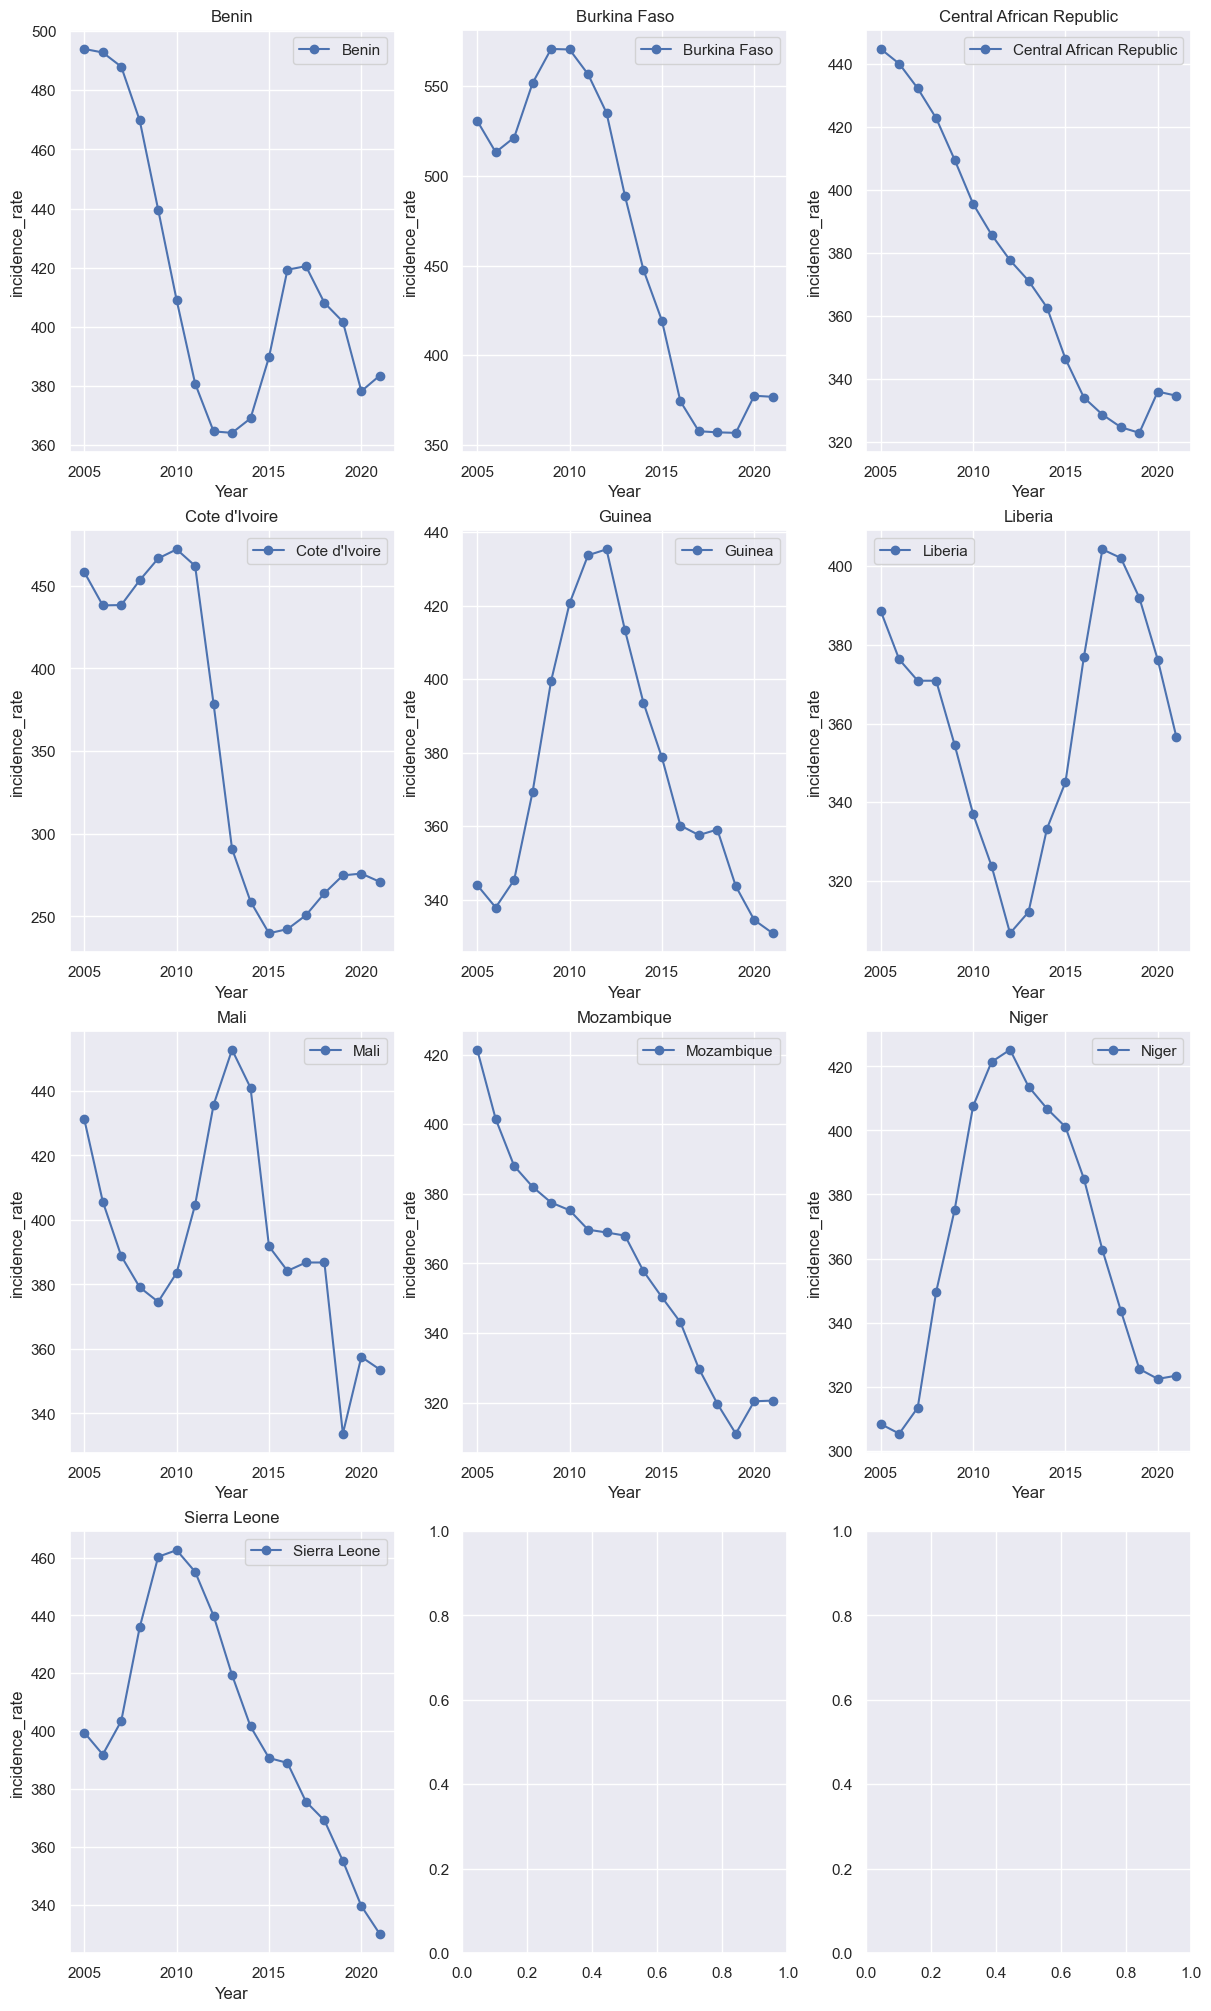

In [17]:
# Group by 'Country' and create subplots
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(12, 20), constrained_layout=True)
axs = axs.flatten()

# Group by 'Country' and plot each group in a separate subplot
for (country, group), ax in zip(top_10_list.groupby('Country'), axs.flatten()):
    group.plot(x='Year', y='incidence_rate (per 1000 pop at risk)', label=country, ax=ax, marker='o')
    ax.set_title(country)
    ax.set_xlabel('Year')
    ax.set_ylabel('incidence_rate')

# Adjust layout and show the plot
plt.show()

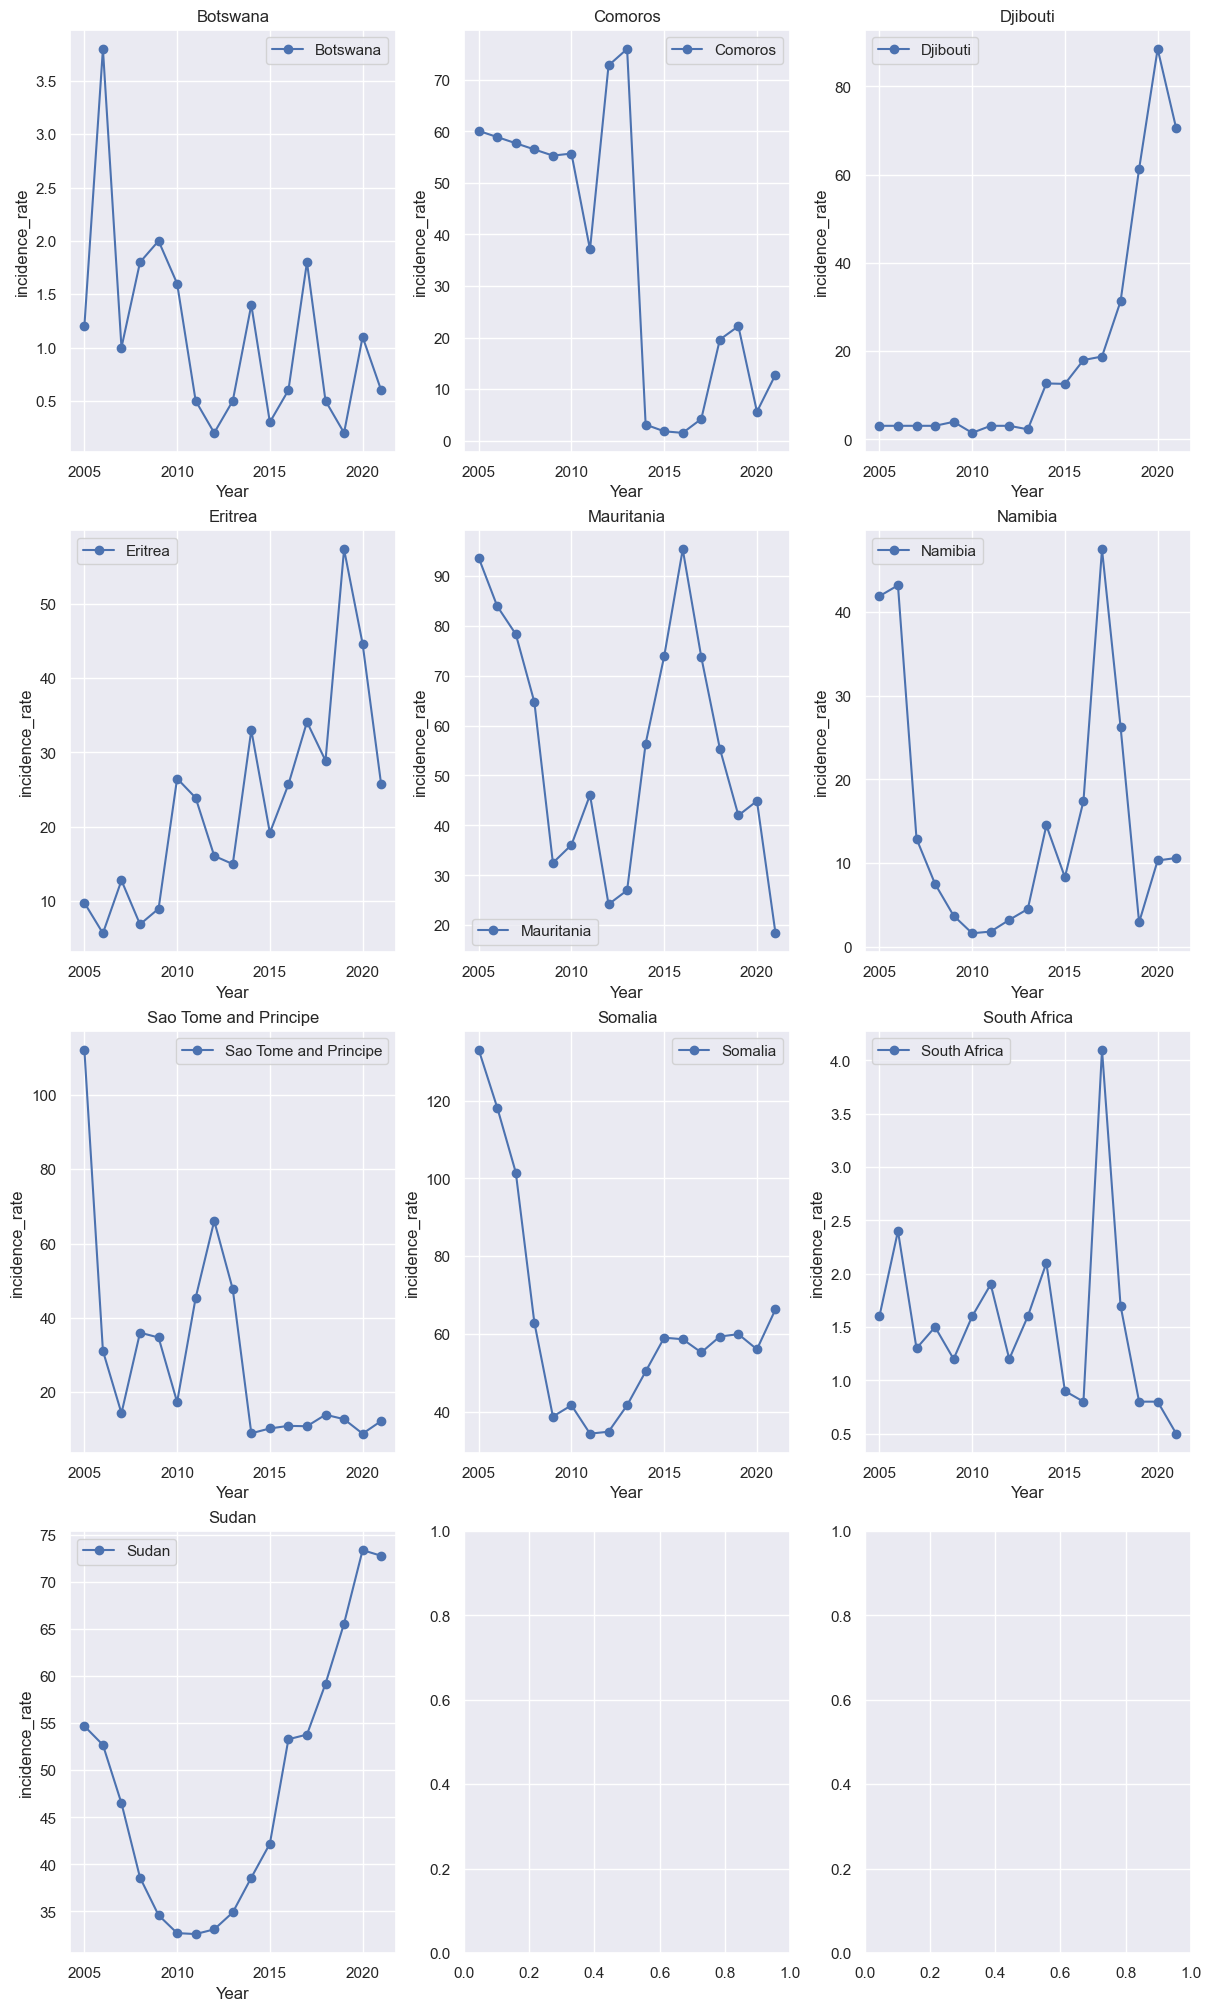

In [18]:
# Group by 'Country' and create subplots
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(12, 20), constrained_layout=True)
axs = axs.flatten()

# Group by 'Country' and plot each group in a separate subplot
for (country, group), ax in zip(bottom_10_list.groupby('Country'), axs.flatten()):
    group.plot(x='Year', y='incidence_rate (per 1000 pop at risk)', label=country, ax=ax, marker='o')
    ax.set_title(country)
    ax.set_xlabel('Year')
    ax.set_ylabel('incidence_rate')

# Adjust layout and show the plot
plt.show()

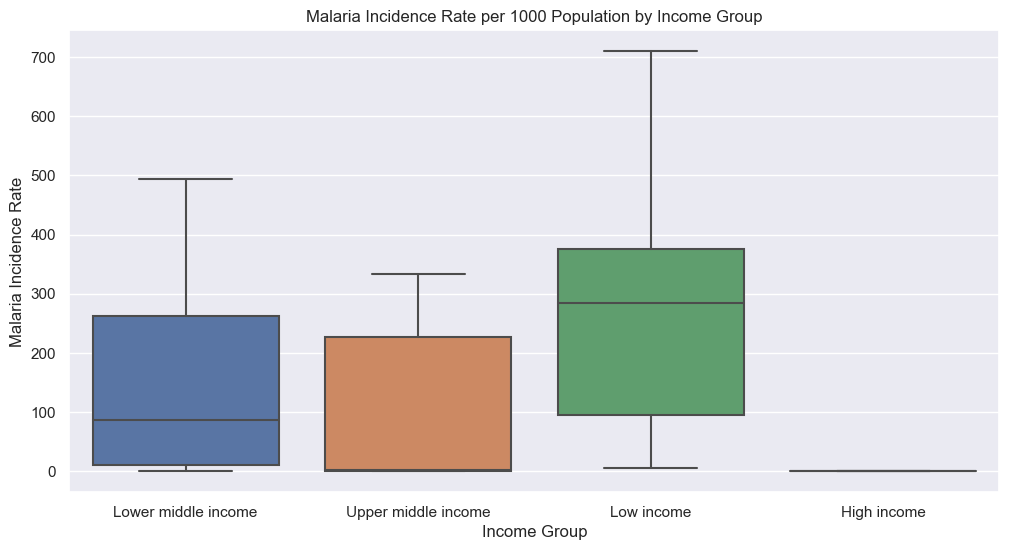

In [19]:
# Malaria incidence rate by Income group
sns.boxplot(x='Income Group', y='incidence_rate (per 1000 pop at risk)', data=malaria,)
plt.xlabel('Income Group')
plt.ylabel('Malaria Incidence Rate')
plt.title('Malaria Incidence Rate per 1000 Population by Income Group');

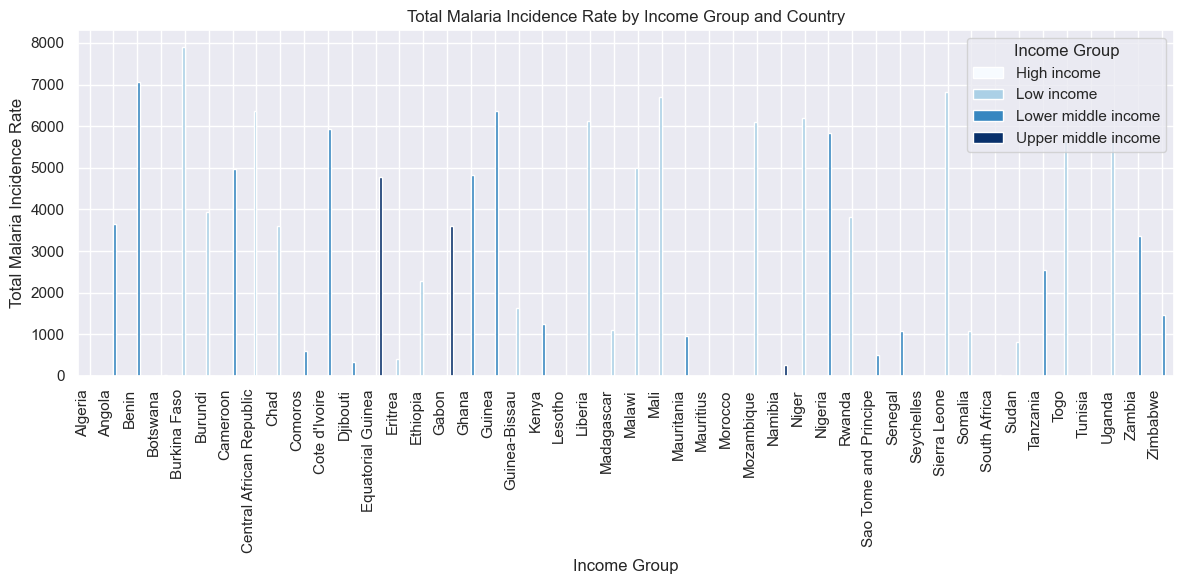

In [70]:
# Get data by income group and country
grouped_data = malaria_feat.groupby(["Country", "Income Group"])["incidence_rate (per 1000 pop at risk)"].sum().sort_values(ascending=True)

# Unstack data for bar chart
unstacked_data = grouped_data.unstack()

# Create bar chart
unstacked_data.plot(kind="bar", stacked=False, colormap="Blues")
plt.xlabel("Income Group")
plt.ylabel("Total Malaria Incidence Rate")
plt.title("Total Malaria Incidence Rate by Income Group and Country")
plt.xticks(rotation=90, ha="right")
plt.legend(title="Income Group")
plt.tight_layout()
plt.show()


This boxplot points to the fact that countries affected by malaria incidence are mostly underdeveloped and developing countries as we can see that high income countries have no record of malaria incidence

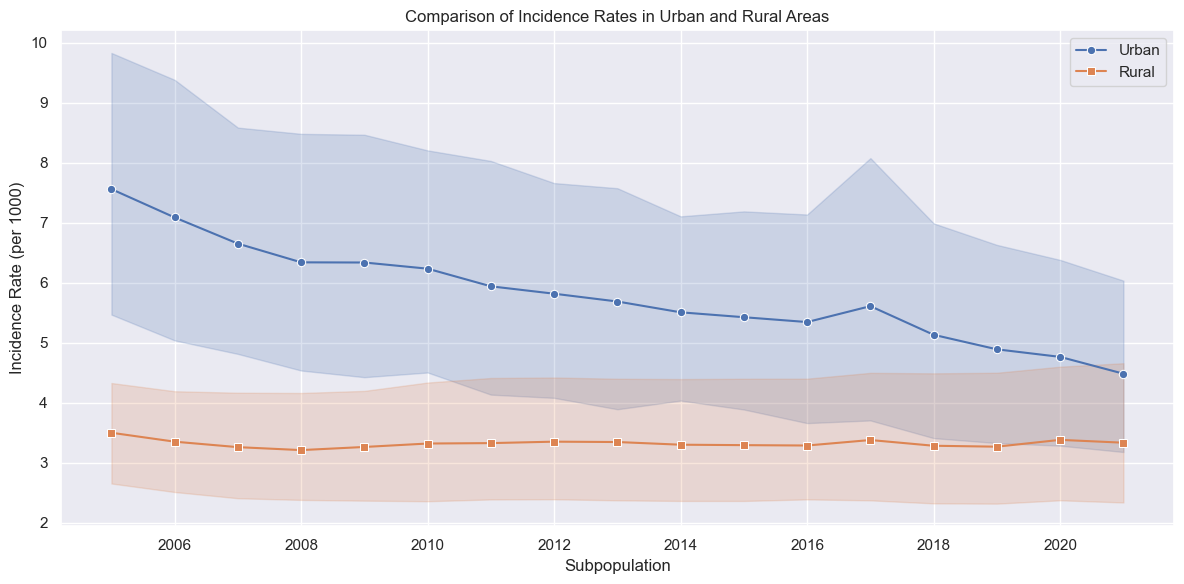

In [20]:
# Calculate incidence rates for rural and urban populations
malaria_feat = malaria.copy()
malaria_feat['incidence_rate_urban'] = malaria_feat['incidence_rate (per 1000 pop at risk)'] / malaria_feat['% urban_pop']
malaria_feat['incidence_rate_rural'] = malaria_feat['incidence_rate (per 1000 pop at risk)'] / malaria_feat['% rural_pop']

# Create a line plot to compare incidence rates
sns.lineplot(x='Year', y='incidence_rate_urban', data=malaria_feat, label='Urban', marker='o')
sns.lineplot(x='Year', y='incidence_rate_rural', data=malaria_feat, label='Rural', marker='s')

# Add a title and axis labels
plt.title('Comparison of Incidence Rates in Urban and Rural Areas')
plt.xlabel('Subpopulation')
plt.ylabel('Incidence Rate (per 1000)')

# Show the plot
plt.tight_layout()
plt.show()

Despite the civilization in the the urban population we can observe that it experience high malaria incidence rate as compared to the rural population, also we saw that there has been a consistent downward trend from the year 2017 to 2021

In [21]:
compared_feat = malaria[['% basic_DW_all', '% basic_sanitation_all', '% death_rate', '% children_with_fever_receiving_treatment','% literacy_rate', 
                         '% rural_pop', '% safe_DW_all',  '% safe_sanitation_all',  
                         '% urban_pop', '% insecticide_treated_bed_net', 'Humidity', 'Precipitation', 'Temperature']]

### Temporal Analysis

In [22]:
def plot_trend_and_scatter(malaria, y_feature):
    """
    Plot trend lines and scatter plot for Malaria Incidence Rate and another feature.

    Parameters:
    - malaria: DataFrame containing the data
    - y_feature: Second feature for trend line

    Returns:
    - None (displays the plots)
    """

    # Create a figure with two subplots (1 row, 2 columns)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Plotting trend lines for 'Malaria Incidence Rate' and another feature
    sns.lineplot(x='Year', y='incidence_rate (per 1000 pop at risk)', data=malaria, label='Malaria Incidence Rate', marker='o', ax=ax1)
    sns.lineplot(x='Year', y=y_feature, data=malaria, label=y_feature, marker='s', ax=ax1)

    ax1.set_xlabel('Year') 
    ax1.set_ylabel('Trend') 
    ax1.set_title(f'Trend of Malaria Incidence Rate per 1000 Population at Risk vs {y_feature}')
    ax1.legend()  

    # Set a common y-axis scale for both features in the line plot
    max_y_value = max(malaria['incidence_rate (per 1000 pop at risk)'].max(), malaria[y_feature].max())
    min_y_value = min(malaria['incidence_rate (per 1000 pop at risk)'].min(), malaria[y_feature].min())
    y_range = max_y_value - min_y_value
    ax1.set_ylim(min_y_value - 0.1 * y_range, max_y_value + 0.1 * y_range)

    plt.tight_layout()

    # Plotting the scatter plot on the second subplot
    ax2.scatter(malaria['incidence_rate (per 1000 pop at risk)'], malaria[y_feature], label='Scatter Plot', color='orange')
    ax2.set_xlabel('Incidence Rate')
    ax2.set_ylabel(y_feature)
    ax2.set_title(f'Scatter Plot of Malaria Incidence Rate per 1000 Population at Risk vs {y_feature}')

    # Display the plots
    plt.tight_layout()
    plt.show()

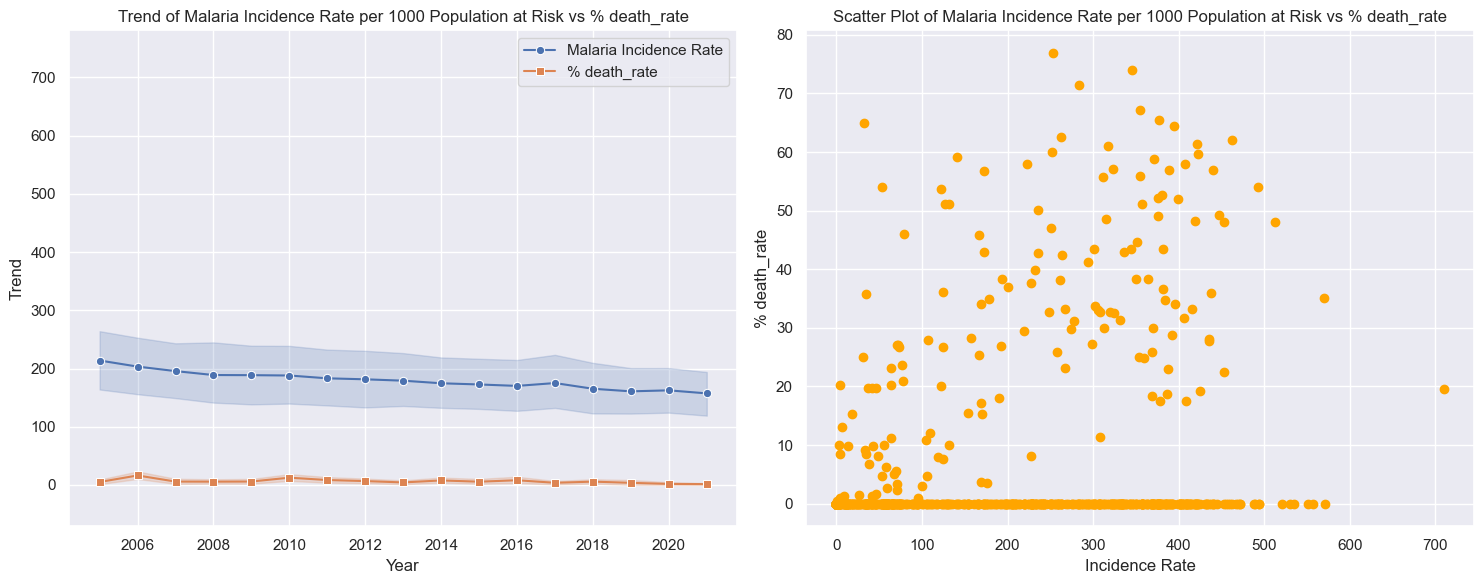

In [23]:
plot_trend_and_scatter(malaria, '% death_rate')

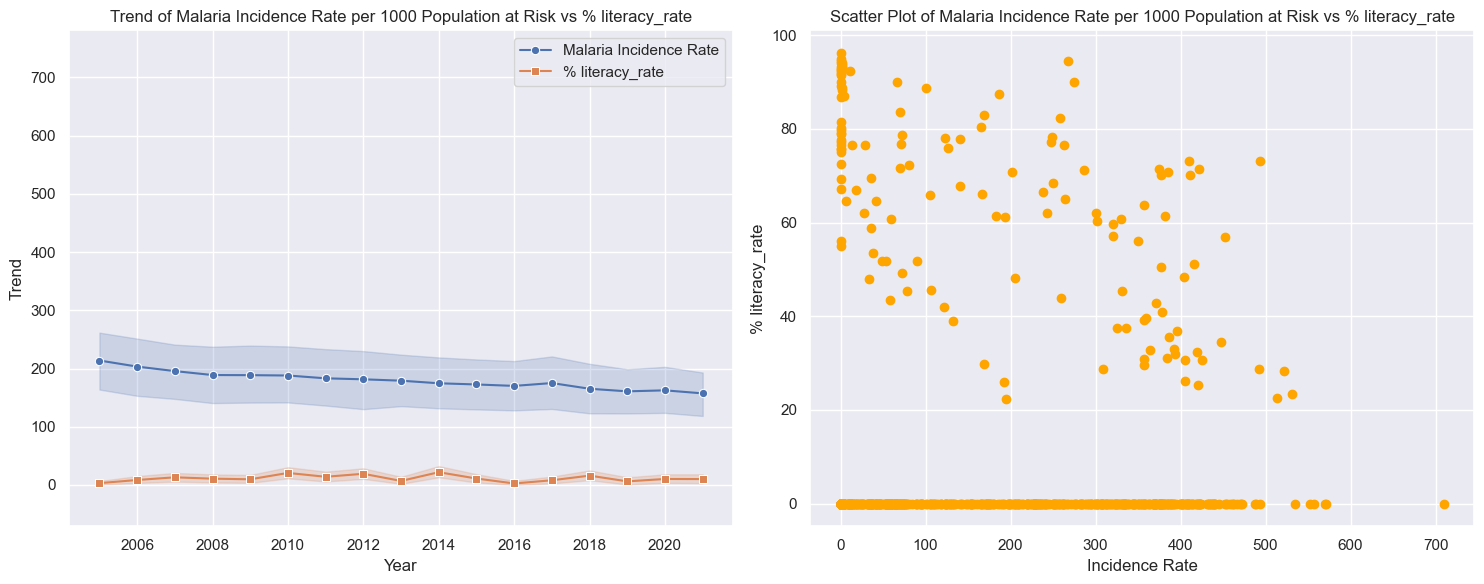

In [24]:
plot_trend_and_scatter(malaria, '% literacy_rate')

#### Comparison of Incidence Rate with Preventive Measures

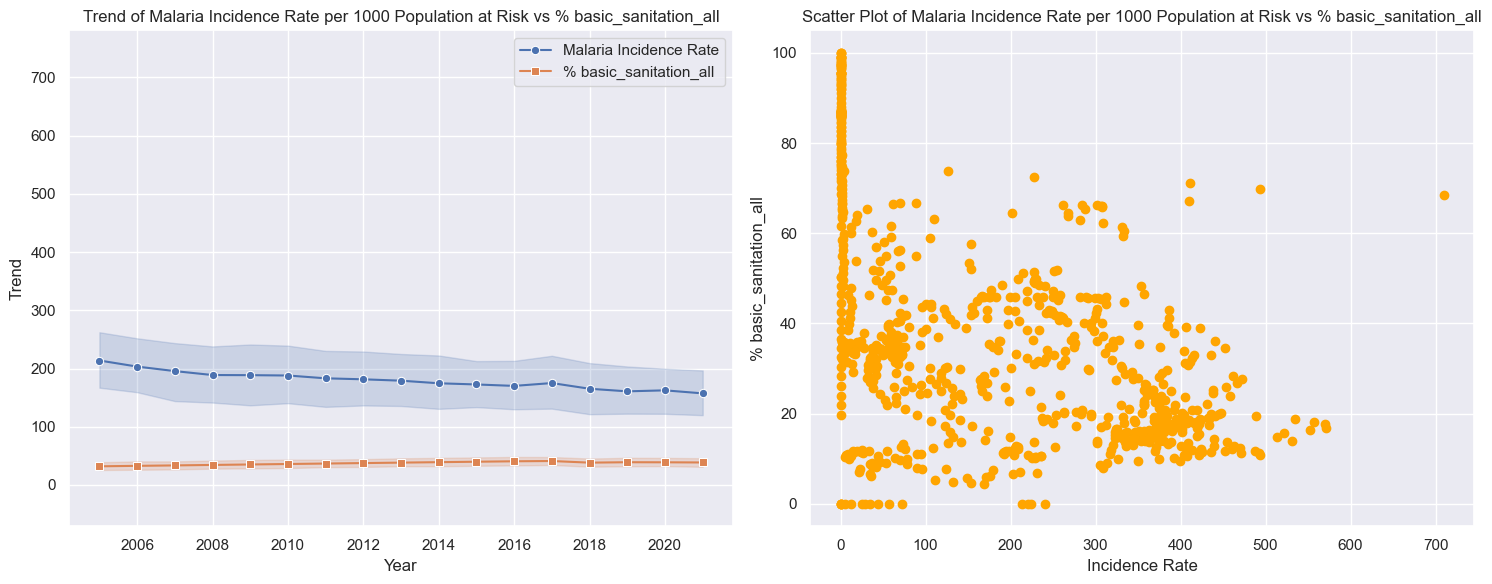

In [25]:
plot_trend_and_scatter(malaria, '% basic_sanitation_all')

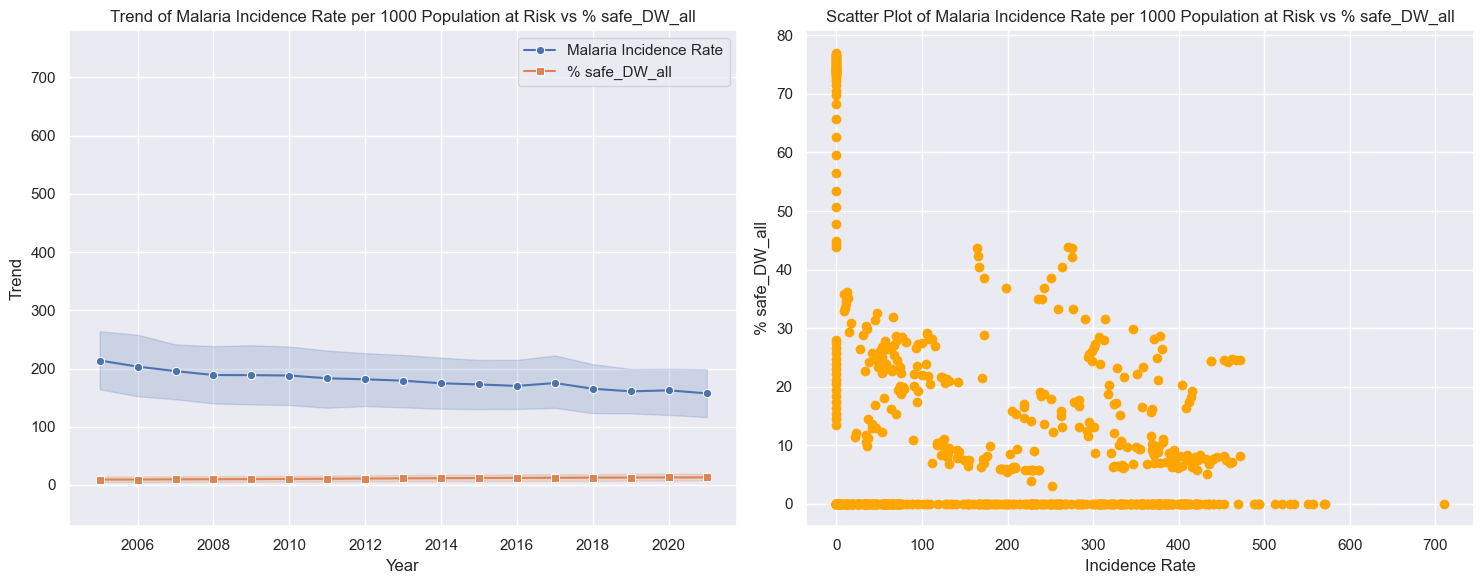

In [26]:
plot_trend_and_scatter(malaria, '% safe_DW_all')

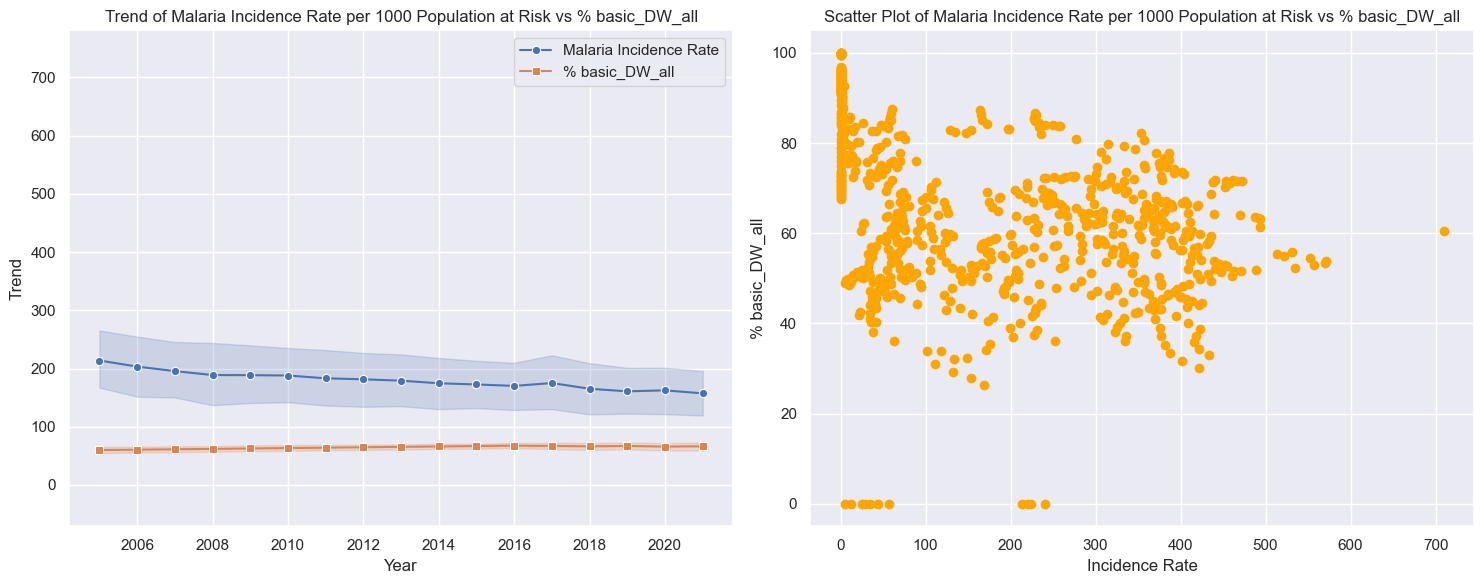

In [27]:
plot_trend_and_scatter(malaria, '% basic_DW_all')

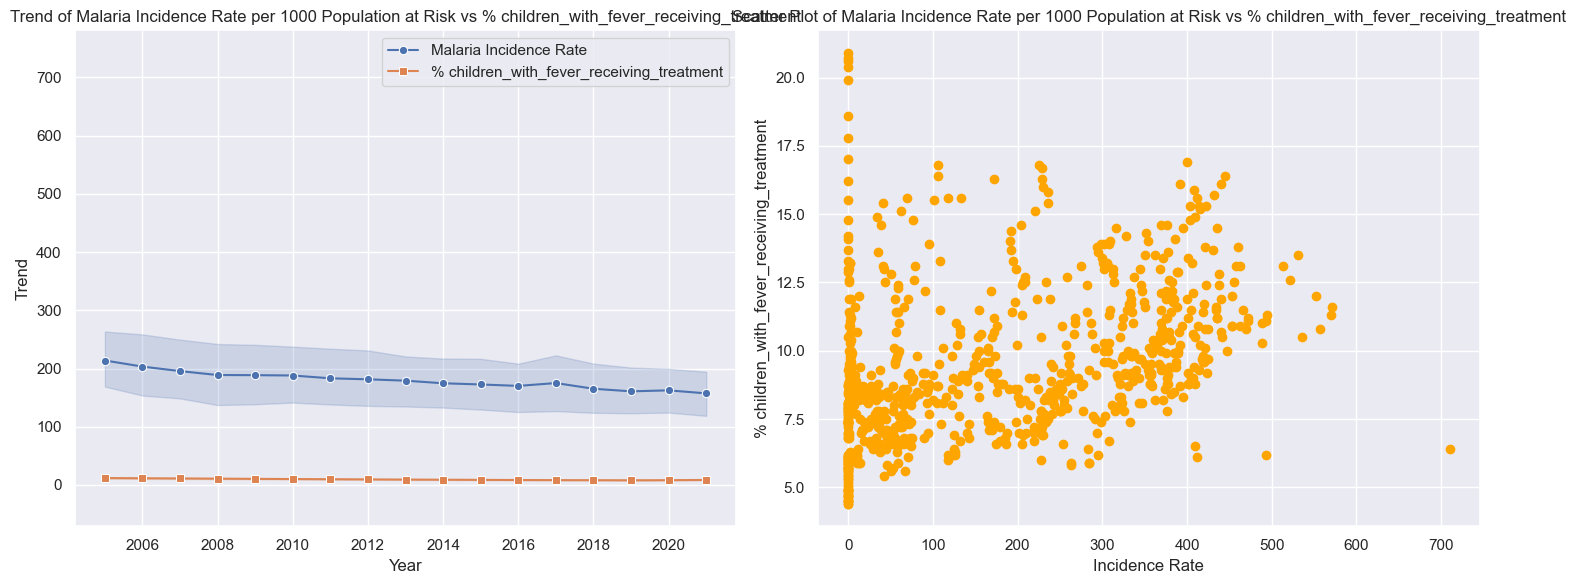

In [28]:
plot_trend_and_scatter(malaria, '% children_with_fever_receiving_treatment')

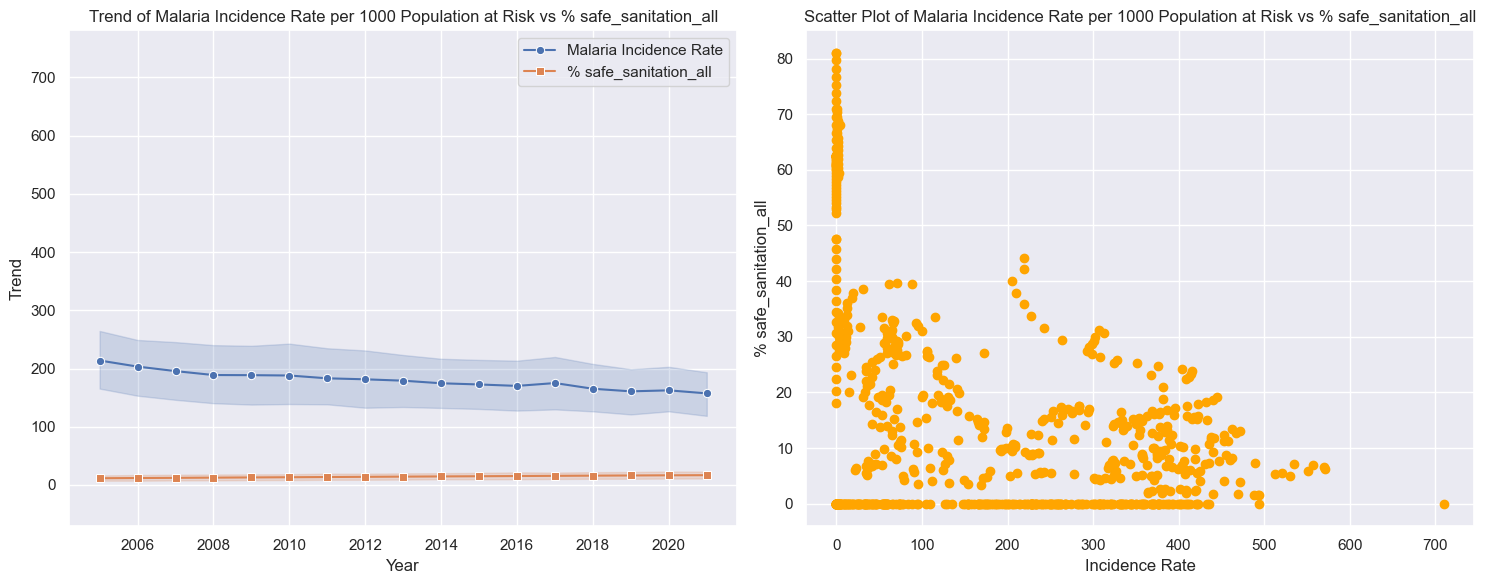

In [29]:
plot_trend_and_scatter(malaria, '% safe_sanitation_all')

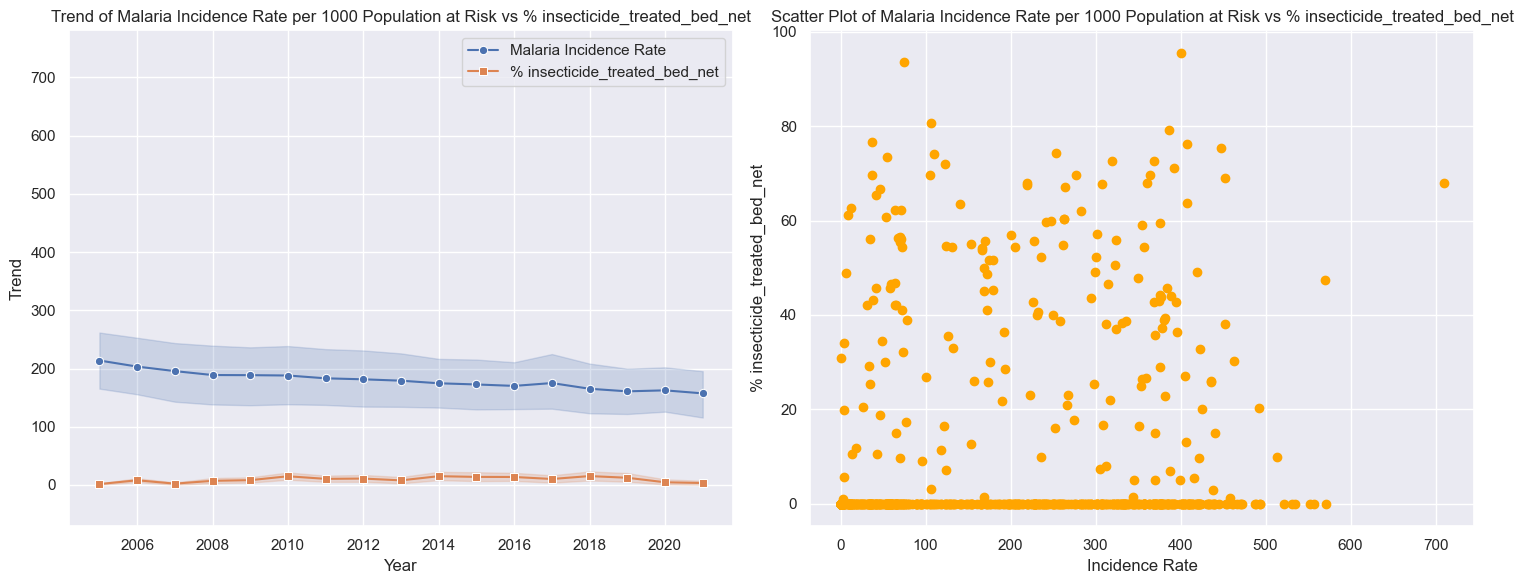

In [30]:
plot_trend_and_scatter(malaria, '% insecticide_treated_bed_net')

#### Comparison with Climate Features

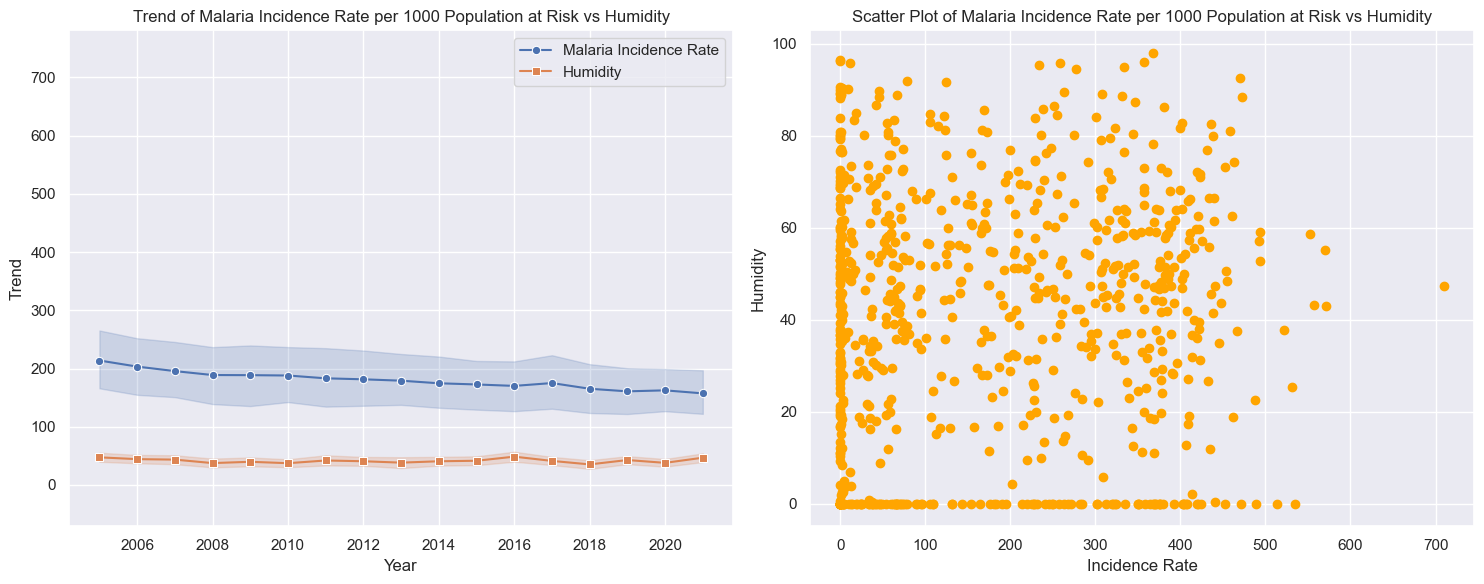

In [31]:
plot_trend_and_scatter(malaria, 'Humidity')

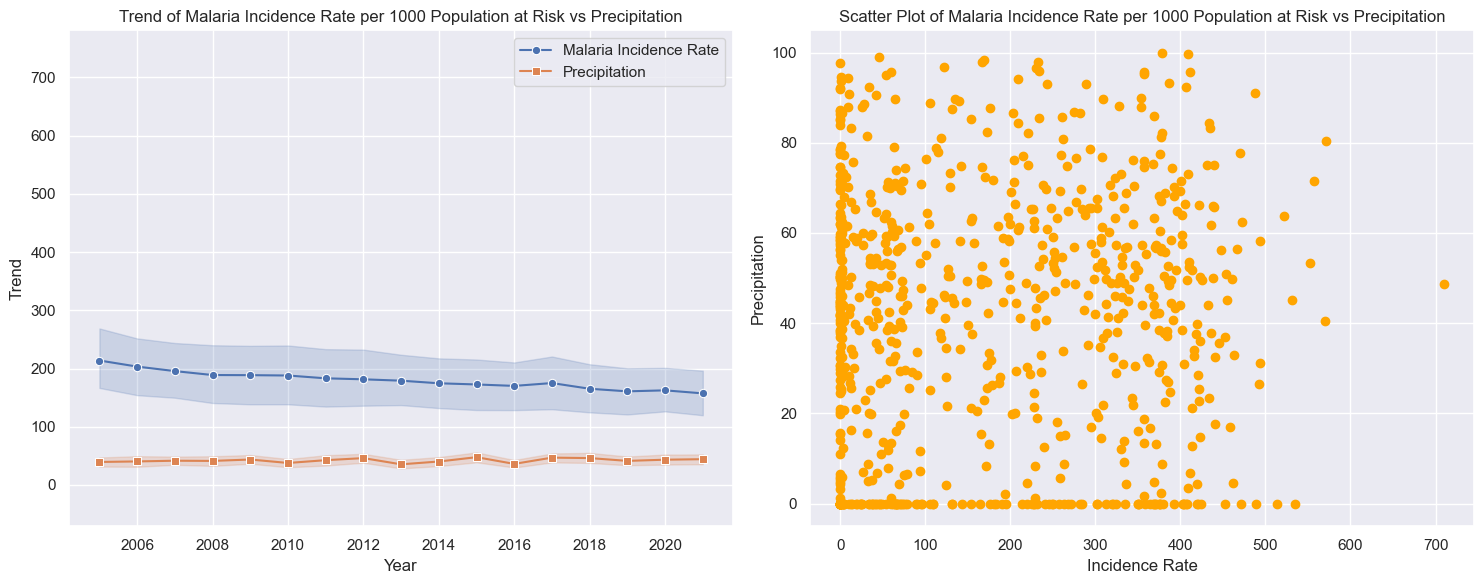

In [32]:
plot_trend_and_scatter(malaria, 'Precipitation')

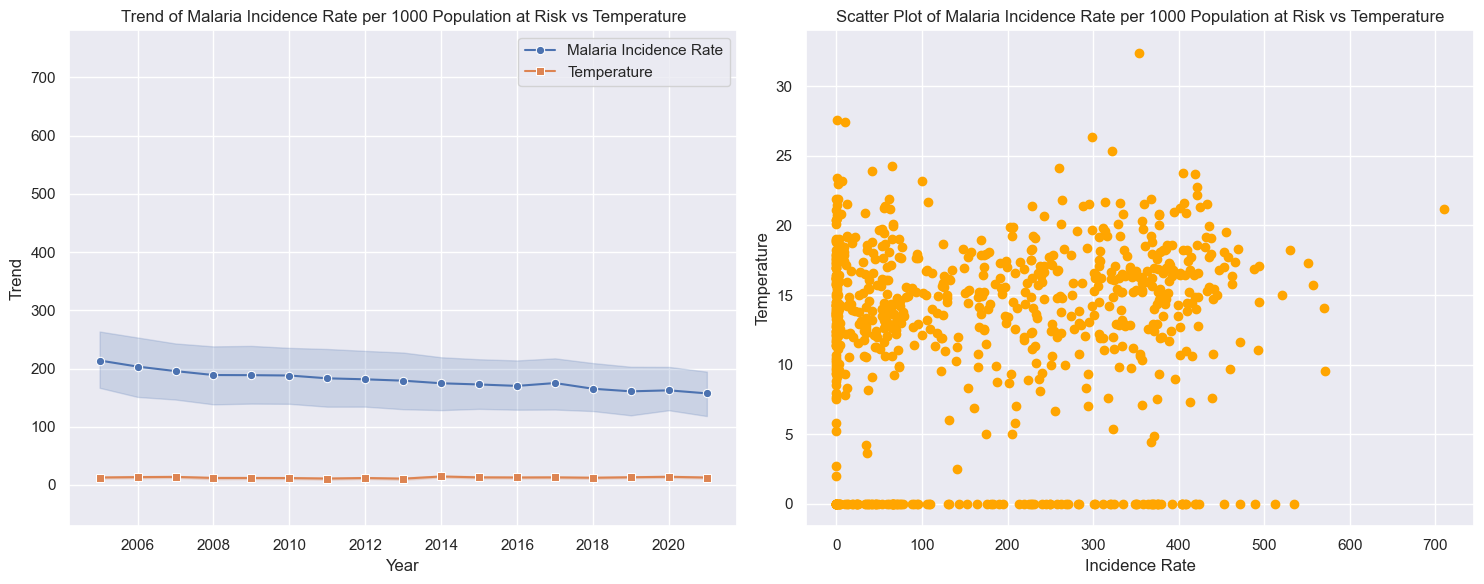

In [33]:
plot_trend_and_scatter(malaria, 'Temperature')

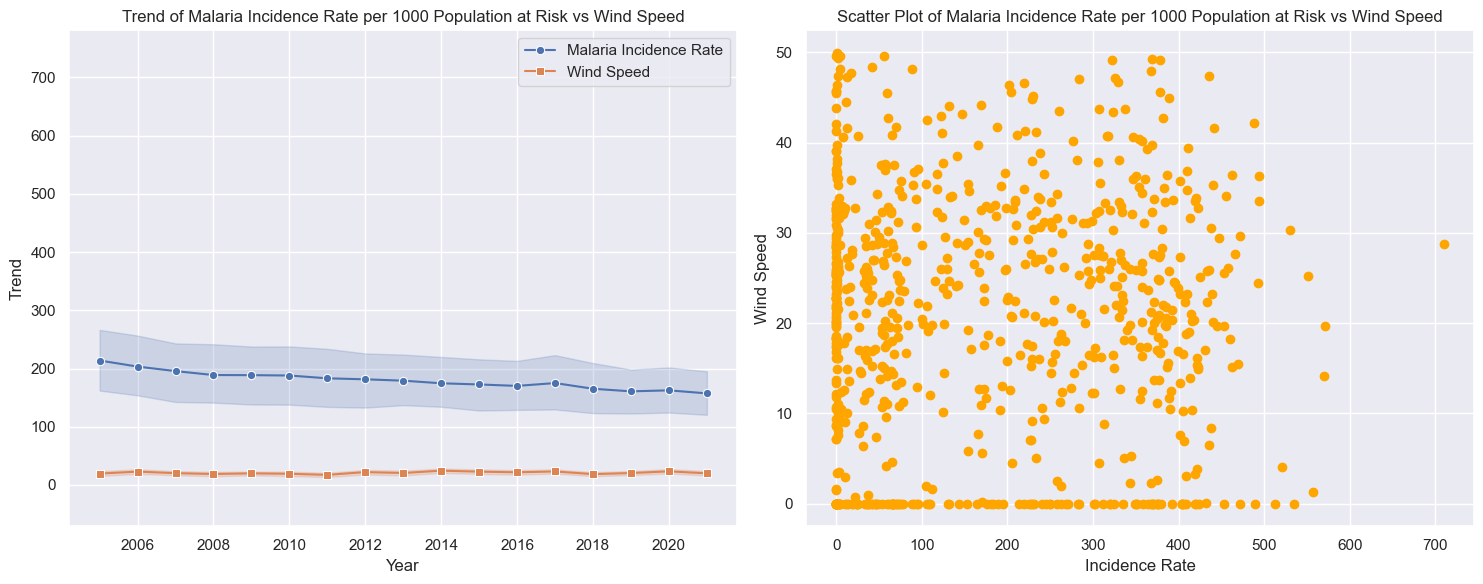

In [34]:
plot_trend_and_scatter(malaria, 'Wind Speed')

In [35]:
compared_feat.columns

Index(['% basic_DW_all', '% basic_sanitation_all', '% death_rate',
       '% children_with_fever_receiving_treatment', '% literacy_rate',
       '% rural_pop', '% safe_DW_all', '% safe_sanitation_all', '% urban_pop',
       '% insecticide_treated_bed_net', 'Humidity', 'Precipitation',
       'Temperature'],
      dtype='object')

### Correlation Analysis

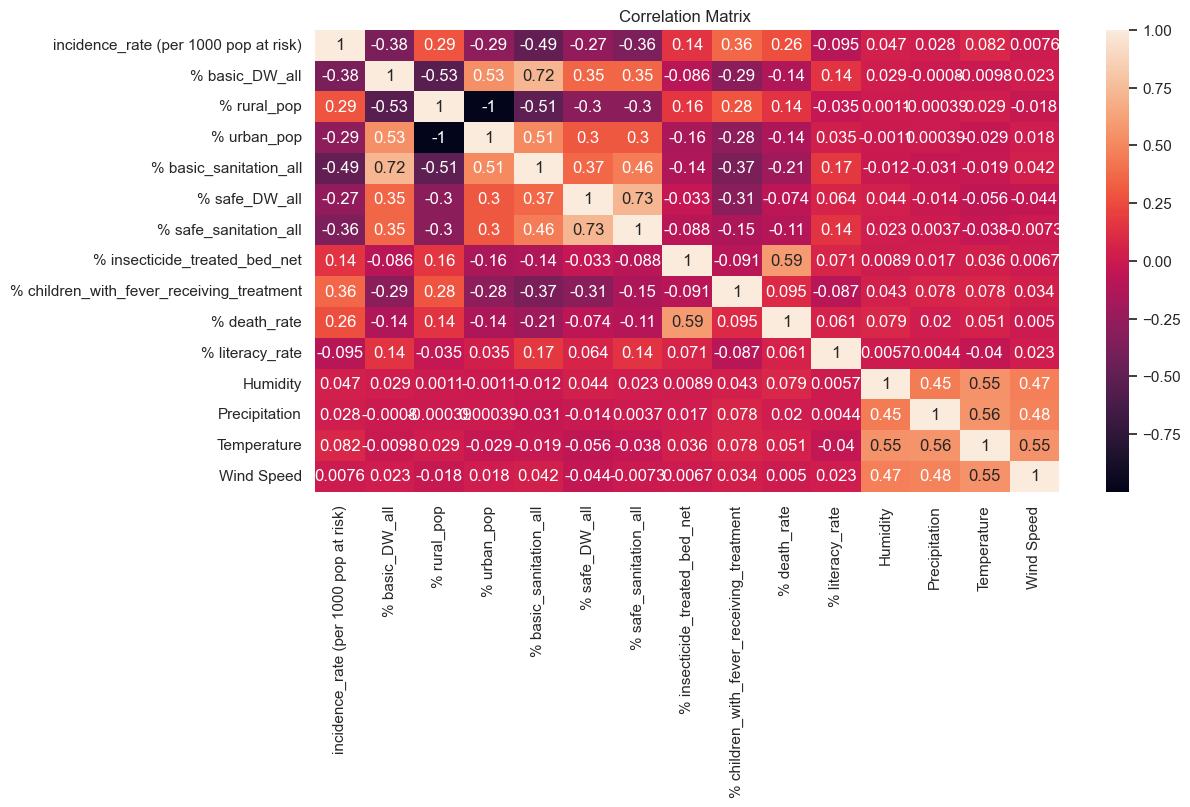

In [36]:
# plotting the Correlation Analysis 
correlation_mat =(malaria 
                  [['incidence_rate (per 1000 pop at risk)','% basic_DW_all','% rural_pop','% urban_pop', '% basic_sanitation_all', 
                    '% safe_DW_all','% safe_sanitation_all','% insecticide_treated_bed_net', '% children_with_fever_receiving_treatment', '% death_rate', 
                    '% literacy_rate','Humidity','Precipitation', 'Temperature', 'Wind Speed']].corr())
sns.heatmap(correlation_mat, annot=True)
plt.title('Correlation Matrix ')
plt.show()

- A very strong negative correlation exists between urban population and rural population.

- A significant correlation is observed between the use of insecticides and the death rate.
- There's a correlation between children with fever and incidence rate
- There is a positive correlation between access to basic drinking water and basic sanitation.

- Additionally, there is a positive correlation between having access to safe drinking water and maintaining safe sanitation practices.

In [37]:
correlation_bar = (malaria[['incidence_rate (per 1000 pop at risk)', '% basic_DW_all','% rural_pop','% urban_pop', '% basic_sanitation_all', '% safe_DW_all',
                    '% safe_sanitation_all','% insecticide_treated_bed_net', '% children_with_fever_receiving_treatment', '% death_rate', '% literacy_rate','Humidity',
                    'Precipitation', 'Temperature', 'Wind Speed']].corr()['incidence_rate (per 1000 pop at risk)'])
correlation_bar.sort_values(ascending=False)

incidence_rate (per 1000 pop at risk)        1.000000
% children_with_fever_receiving_treatment    0.360085
% rural_pop                                  0.288738
% death_rate                                 0.261859
% insecticide_treated_bed_net                0.143446
Temperature                                  0.081775
Humidity                                     0.046661
Precipitation                                0.027959
Wind Speed                                   0.007565
% literacy_rate                             -0.095479
% safe_DW_all                               -0.272089
% urban_pop                                 -0.288729
% safe_sanitation_all                       -0.364782
% basic_DW_all                              -0.379782
% basic_sanitation_all                      -0.486653
Name: incidence_rate (per 1000 pop at risk), dtype: float64

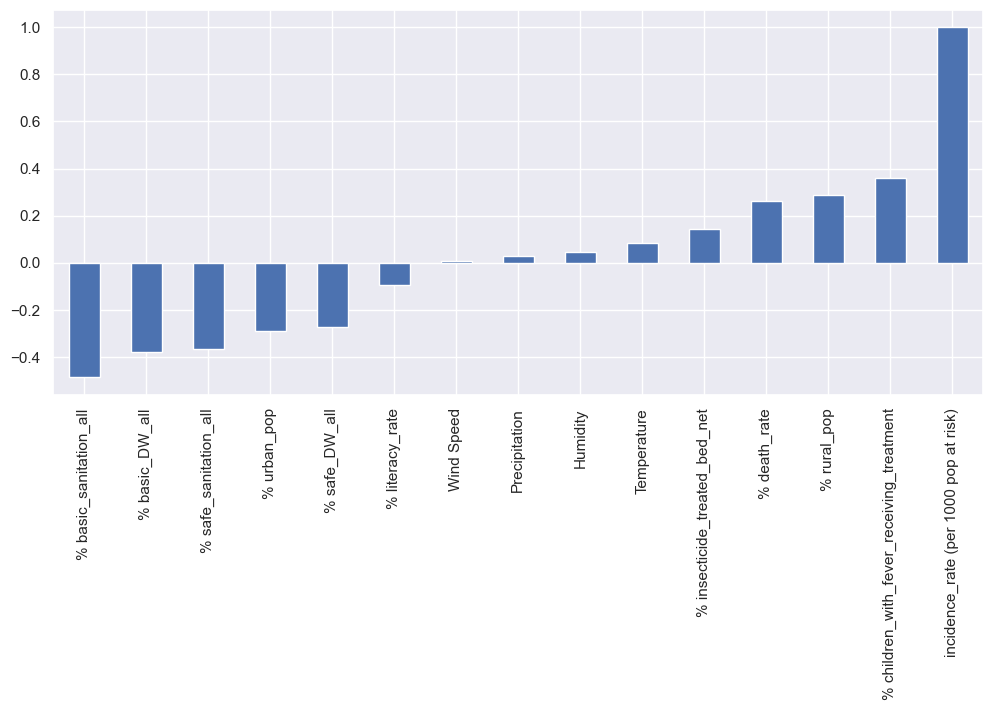

In [38]:
# Features correlation with target
correlation_bar = (malaria[['incidence_rate (per 1000 pop at risk)','% basic_DW_all','% rural_pop','% urban_pop', '% basic_sanitation_all', '% safe_DW_all',
                    '% safe_sanitation_all','% insecticide_treated_bed_net', '% children_with_fever_receiving_treatment', '% death_rate', '% literacy_rate','Humidity',
                    'Precipitation', 'Temperature', 'Wind Speed']].corr()['incidence_rate (per 1000 pop at risk)'])
correlation_bar.sort_values().plot(kind='bar',figsize=(12,5));
plt.savefig("images/Correlation_of_Features_with_Incidence_Rate.png", dpi=150)

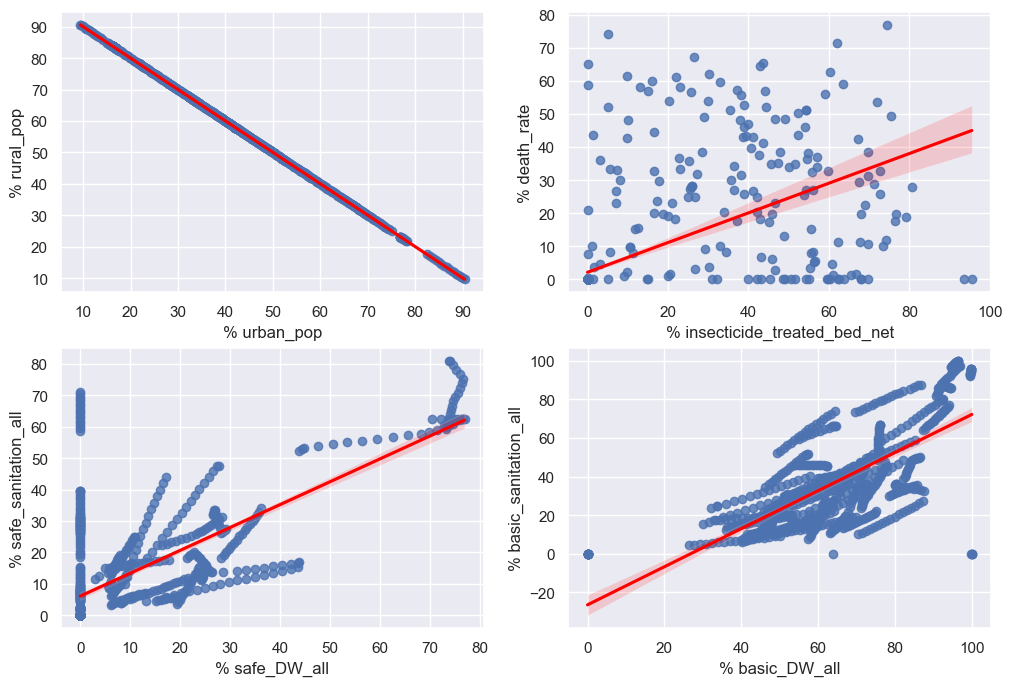

In [39]:
#plotting regplot to see their relationship
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.regplot(data = malaria,x='% urban_pop', y='% rural_pop',line_kws={"color": "red"},ax=axes[0, 0])
sns.regplot(data = malaria,x='% insecticide_treated_bed_net', y='% death_rate', line_kws={"color": "red"},ax=axes[0, 1])
sns.regplot(data =malaria,x='% basic_DW_all', y='% basic_sanitation_all',line_kws={"color": "red"}, ax=axes[1, 1])
sns.regplot(data = malaria,x='% safe_DW_all', y='% safe_sanitation_all',line_kws={"color": "red"}, ax=axes[1, 0]);

We can see that some of the variables are strongly correlated but none has a correlation with incidence rate. Let's check the top 5 countries with incidence rate, since they are the benchmarks we are working with.

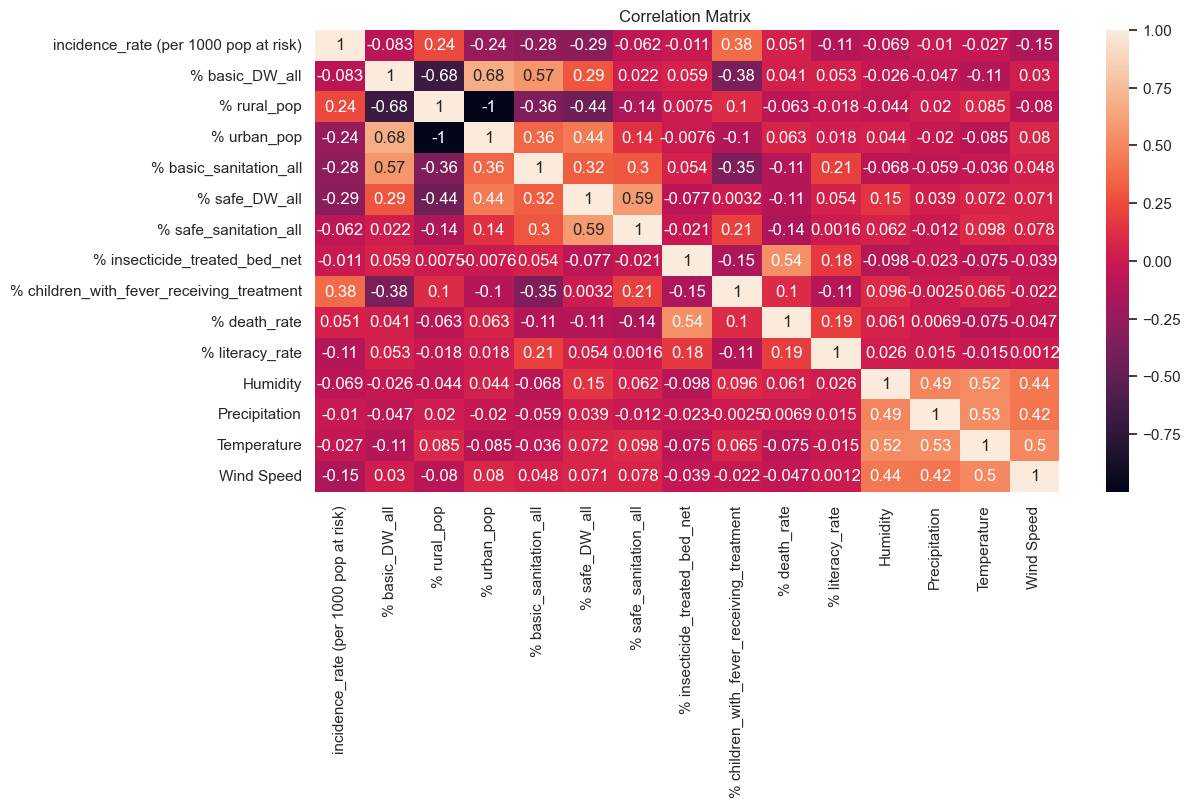

In [40]:
# plotting heatmap for top 10 countries
correlation_mat =(top_10_list
                  [['incidence_rate (per 1000 pop at risk)','% basic_DW_all','% rural_pop','% urban_pop', '% basic_sanitation_all', 
                    '% safe_DW_all','% safe_sanitation_all','% insecticide_treated_bed_net', '% children_with_fever_receiving_treatment', '% death_rate', 
                    '% literacy_rate','Humidity','Precipitation', 'Temperature', 'Wind Speed' ]].corr())
sns.heatmap(correlation_mat, annot=True)
plt.title('Correlation Matrix ')
plt.show()

- There's a negative correlation btw urban pop and incidence rate and a positive corellation between rural pop and incidence rate
- The very strong negative corr between urban pop and rural still stands
- There's a corr between literate rate and insecticide
- There's a correlation between children with fever and incidence rate
- The positive correlation between access to basic drinking water and basic sanitation still stands.
- The corr between the use of insecticides and the death rate still stands.
- The positive correlation between having access to safe drinking water and maintaining safe sanitation practices still stands.

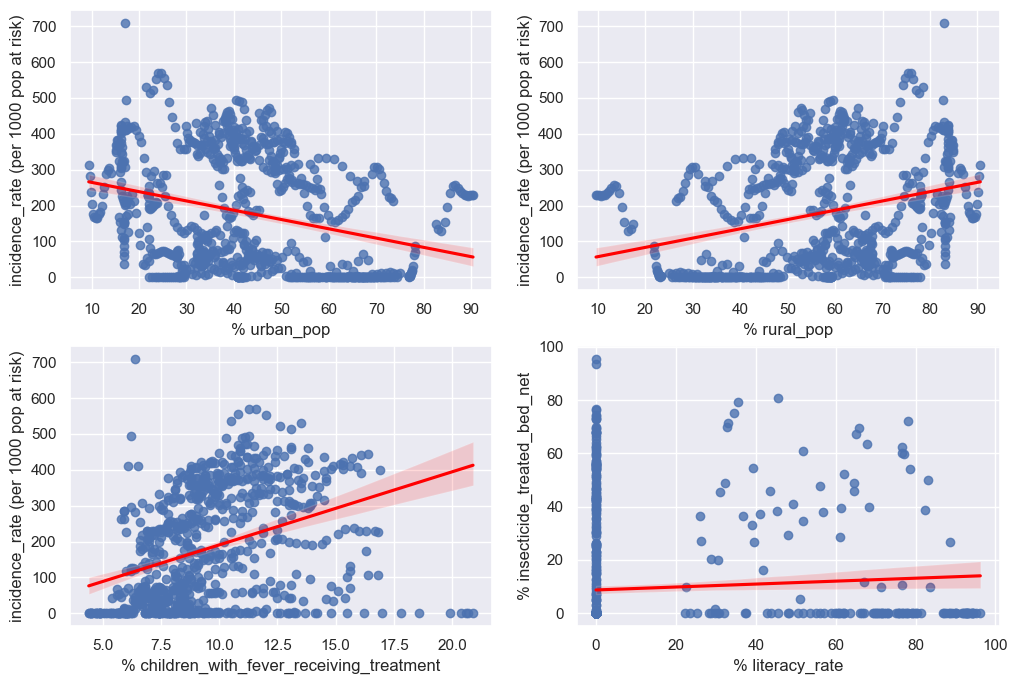

In [41]:
#plotting regplot to see their relationship
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.regplot(data = malaria,x='% urban_pop', y='incidence_rate (per 1000 pop at risk)',line_kws={"color": "red"},ax=axes[0, 0])
sns.regplot(data = malaria,x='% rural_pop', y='incidence_rate (per 1000 pop at risk)', line_kws={"color": "red"},ax=axes[0, 1])
sns.regplot(data =malaria,x='% literacy_rate', y='% insecticide_treated_bed_net',line_kws={"color": "red"}, ax=axes[1, 1])
sns.regplot(data = malaria,x='% children_with_fever_receiving_treatment', y='incidence_rate (per 1000 pop at risk)',line_kws={"color": "red"}, ax=axes[1, 0]);

The analysis reveals that children with a fever exhibit higher incidence rates. Additionally, there is a trend of decreasing incidence rates as the population increases in urban areas, while the rural areas show an opposite pattern with an increase in incidence rates. Furthermore, an increase in the death rate is predominantly attributed to the use of insecticides, rather than the incidence rate of malaria, with the latter being more prevalent among the literate population.

In [42]:
malaria

Country Code   Country         Income Group  Year  \
0            DZA   Algeria  Lower middle income  2005   
1            DZA   Algeria  Lower middle income  2006   
2            DZA   Algeria  Lower middle income  2007   
3            DZA   Algeria  Lower middle income  2008   
4            DZA   Algeria  Lower middle income  2009   
..           ...       ...                  ...   ...   
777          ZWE  Zimbabwe  Lower middle income  2017   
778          ZWE  Zimbabwe  Lower middle income  2018   
779          ZWE  Zimbabwe  Lower middle income  2019   
780          ZWE  Zimbabwe  Lower middle income  2020   
781          ZWE  Zimbabwe  Lower middle income  2021   

     incidence_rate (per 1000 pop at risk)  % basic_DW_all  % basic_DW_rural  \
0                                      0.0            91.1              85.0   
1                                      0.0            91.4              85.4   
2                                      0.0            91.6              85.7   
3                                      0.0            91.8              86.0   
4                                      0.0            92.1              86.4   
..                                     ...             ...               ...   
777                                  115.2            64.0              50.1   
778                                   53.6            63.5              49.5   
779                                   64.7            63.1              48.9   
780                                   93.4            62.7              48.3   
781                                   27.2            62.3              47.7   

     % basic_DW_urban  % basic_sanitation_all  % basic_sanitation_rural  \
0                94.6                    85.8                      75.4   
1                94.7                    86.1                      75.7   
2                94.7                    86.3                      76.1   
3                94.8                    86.5                      76.4   
4                94.9                    86.8                      76.7   
..                ...                     ...                       ...   
777              93.3                    36.9                      32.6   
778              93.2                    36.4                      32.4   
779              93.0                    35.8                      32.2   
780              92.9                    35.2                      32.0   
781              92.8                    34.6                      31.8   

     % basic_sanitation_urban  % death_rate  \
0                        91.7           0.0   
1                        91.7           0.0   
2                        91.7           0.0   
3                        91.7           0.0   
4                        91.7           0.0   
..                        ...           ...   
777                      46.0           0.0   
778                      44.6           0.0   
779                      43.2           0.0   
780                      41.8           0.0   
781                      40.4           0.0   

     % children_with_fever_receiving_treatment  % literacy_rate  % rural_pop  \
0                                          4.9              0.0         36.2   
1                                          4.9             72.6         35.4   
2                                          4.9              0.0         34.7   
3                                          4.9             75.1         33.9   
4                                          4.7              0.0         33.2   
..                                         ...              ...          ...   
777                                        8.3              0.0         67.8   
778                                        8.0              0.0         67.8   
779                                        8.0              0.0         67.8   
780                                        8.1              0.0         67.8   
781         

#### Geospatial Analysis

In [43]:
#convert year to string
malaria.Year = malaria.Year.astype(str)

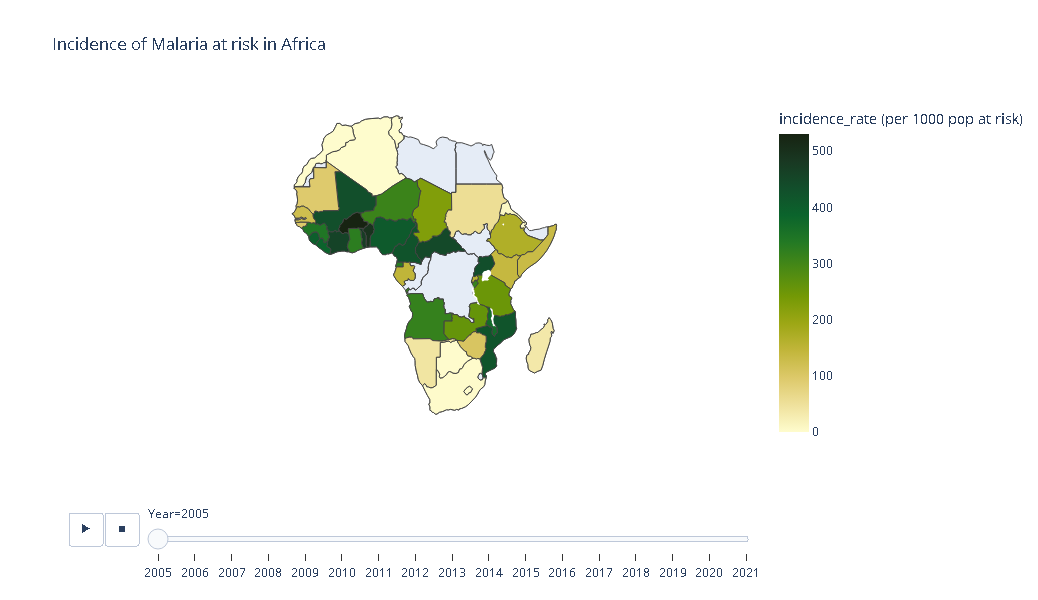

In [60]:
#Incidence of Malaria at risk
fig = px.choropleth(malaria,locations=malaria['Country Code'],
                     color=malaria['incidence_rate (per 1000 pop at risk)'],
                     color_continuous_scale='speed',
                     locationmode='ISO-3',scope='africa',
                     animation_frame=malaria['Year'],title="Incidence of Malaria at risk in Africa",
                     labels={'color':'Incidence of Malaria'})
fig.update_layout(width=800, height=600)
fig.show()

In [49]:
malaria.columns

Index(['Country Code', 'Country', 'Income Group', 'Year',
       'incidence_rate (per 1000 pop at risk)', '% basic_DW_all',
       '% basic_DW_rural', '% basic_DW_urban', '% basic_sanitation_all',
       '% basic_sanitation_rural', '% basic_sanitation_urban', '% death_rate',
       '% children_with_fever_receiving_treatment', '% literacy_rate',
       '% rural_pop', '% safe_DW_all', '% safe_DW_rural', '% safe_DW_urban',
       '% safe_sanitation_all', '% safe_sanitation_rural',
       '% safe_sanitation_urban', '% urban_pop',
       '% insecticide_treated_bed_net', 'Latitude', 'Longitude ', 'Geometry',
       'Humidity', 'Precipitation', 'Temperature', 'Wind Speed'],
      dtype='object')

In [50]:
malaria.drop(columns=['Country Code', '% basic_DW_rural', '% basic_DW_urban', '% basic_sanitation_rural', '% basic_sanitation_urban',
                      '% safe_DW_rural', '% safe_DW_urban', '% safe_sanitation_rural','% safe_sanitation_urban',
                      'Latitude', 'Longitude ', 'Geometry'], inplace=True)
malaria.head()

Country         Income Group  Year  incidence_rate (per 1000 pop at risk)  \
0  Algeria  Lower middle income  2005                                    0.0   
1  Algeria  Lower middle income  2006                                    0.0   
2  Algeria  Lower middle income  2007                                    0.0   
3  Algeria  Lower middle income  2008                                    0.0   
4  Algeria  Lower middle income  2009                                    0.0   

   % basic_DW_all  % basic_sanitation_all  % death_rate  \
0            91.1                    85.8           0.0   
1            91.4                    86.1           0.0   
2            91.6                    86.3           0.0   
3            91.8                    86.5           0.0   
4            92.1                    86.8           0.0   

   % children_with_fever_receiving_treatment  % literacy_rate  % rural_pop  \
0                                        4.9              0.0         36.2   
1                                        4.9             72.6         35.4   
2                                        4.9              0.0         34.7   
3                                        4.9             75.1         33.9   
4                                        4.7              0.0         33.2   

   % safe_DW_all  % safe_sanitation_all  % urban_pop  \
0           72.8                   60.5         63.8   
1           73.2                   60.8         64.6   
2           73.7                   61.1         65.3   
3           74.2                   61.4         66.1   
4           74.6                   61.7         66.8   

   % insecticide_treated_bed_net   Humidity  Precipitation  Temperature  \
0                            0.0  31.734205      10.968121    13.504072   
1                            0.0   0.000000       0.000000     0.000000   
2                            0.0  69.520863      74.638687     5.783653   
3                            0.0  52.958708      86.310334     7.554852   
4                            0.0  88.990603      44.402714    17.102406   

   Wind Speed  
0    8.769347  
1    0.000000  
2   25.478604  
3    8.661352  
4   26.639289

In [51]:
# Calculate the frequency for categorical  column
country_freq = malaria['Country'].value_counts(normalize=True)
income_freq = malaria['Income Group'].value_counts(normalize=True)


# Create a dictionary to map each category to its corresponding frequency
country_freq_mapping = country_freq.to_dict()
income_freq_mapping = income_freq.to_dict()


# Map the 'loc' column to its corresponding frequency values
malaria['Country'] = malaria['Country'].map(country_freq_mapping)
malaria['Income Group'] = malaria['Income Group'].map(income_freq_mapping)

# Print the updated dataframe
malaria.head()

Country  Income Group  Year  incidence_rate (per 1000 pop at risk)  \
0  0.021739      0.434783  2005                                    0.0   
1  0.021739      0.434783  2006                                    0.0   
2  0.021739      0.434783  2007                                    0.0   
3  0.021739      0.434783  2008                                    0.0   
4  0.021739      0.434783  2009                                    0.0   

   % basic_DW_all  % basic_sanitation_all  % death_rate  \
0            91.1                    85.8           0.0   
1            91.4                    86.1           0.0   
2            91.6                    86.3           0.0   
3            91.8                    86.5           0.0   
4            92.1                    86.8           0.0   

   % children_with_fever_receiving_treatment  % literacy_rate  % rural_pop  \
0                                        4.9              0.0         36.2   
1                                        4.9             72.6         35.4   
2                                        4.9              0.0         34.7   
3                                        4.9             75.1         33.9   
4                                        4.7              0.0         33.2   

   % safe_DW_all  % safe_sanitation_all  % urban_pop  \
0           72.8                   60.5         63.8   
1           73.2                   60.8         64.6   
2           73.7                   61.1         65.3   
3           74.2                   61.4         66.1   
4           74.6                   61.7         66.8   

   % insecticide_treated_bed_net   Humidity  Precipitation  Temperature  \
0                            0.0  31.734205      10.968121    13.504072   
1                            0.0   0.000000       0.000000     0.000000   
2                            0.0  69.520863      74.638687     5.783653   
3                            0.0  52.958708      86.310334     7.554852   
4                            0.0  88.990603      44.402714    17.102406   

   Wind Speed  
0    8.769347  
1    0.000000  
2   25.478604  
3    8.661352  
4   26.639289